In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import seaborn as sns
import astropy.stats as aps

% matplotlib inline

def init_plotting(x=9,y=7):
    plt.rcParams['figure.figsize'] = (x,y)
    plt.rcParams['font.size'] = 15
    plt.rcParams['figure.facecolor'] = '#ffffff'
    # plt.rcParams['font.family'] = 'Asana Math'
    plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = 0.75*plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = 0.65*plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['xtick.major.size'] = 3
    plt.rcParams['xtick.minor.size'] = 3
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['xtick.minor.width'] = 1
    plt.rcParams['ytick.major.size'] = 3
    plt.rcParams['ytick.minor.size'] = 3
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['ytick.minor.width'] = 1
    plt.rcParams['legend.frameon'] = True
    plt.rcParams['legend.fontsize'] = 8
    plt.rcParams['legend.loc'] = 'best'
    plt.rcParams['axes.linewidth'] = 1

init_plotting()


## Dados e Filtragemda Amostra

In [3]:
exo = pd.read_csv('exoplanet.eu_catalog.csv') #abrindo tabela de exoplanets.eu

#Condições necessárias pra definição da amostra, usei 3 campos diferentes que indicam métodos de detecção

raionull = exo['mass'].notnull() #filtro de linhas com valor de raio não nulo 
massanull = exo['radius'].notnull() #filtro de linhas com valor de massa não nulo
confirmed = exo['planet_status'] == 'Confirmed' #filtro de planetas confirmados
massj = exo['mass'] > 0.1 #filtro de planetas com massa > 0.1 M_j
transito = (exo['detection_type'] == 'Primary Transit') & (exo['radius_detection_type'] == 'Primary Transit') #filtro por detecção de trânsito
ttv = (exo['detection_type'] == 'TTV') | (exo['detection_type'] == 'Primary Transit, TTV') | (exo['mass_detection_type'] == 'TTV') #filtro por detecção TTV
rv = (exo['detection_type'] == 'Radial Velocity') | (exo['mass_detection_type'] == 'Radial Velocity') #filtro por detecção de velocidade radial

In [4]:
# Montando a amostra e contando

amostra=(exo[massj & confirmed & transito & raionull & massanull & (ttv | rv)]) #aplicando os filtros a tabela original para extrair a amostra
amostra


,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
86,CVSO 30 b,Confirmed,6.200,1.7000,1.9000,5.500,1.400,1.4000,1.910,0.210,...,M3 PMS,0.00265,0.00003,0.000030,3740.0,NaN,NaN,NaN,NaN,PTFO 8-8695
93,CoRoT-15 b,Confirmed,63.400,4.1000,4.3000,63.300,4.000,4.0000,1.120,0.150,...,F7V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2MASS J06282781+0611105
108,CoRoT-28 b,Confirmed,0.484,0.0870,0.0870,0.484,0.087,0.0870,0.955,0.066,...,G8/9IV,12.00000,1.50000,1.500000,5150.0,100.0,100.0,NaN,NaN,NaN
109,CoRoT-29 b,Confirmed,0.850,0.2000,0.2000,0.850,0.200,0.2000,0.900,0.160,...,KOV,4.50000,3.50000,3.500000,5260.0,100.0,100.0,NaN,NaN,NaN
112,CoRoT-31 b,Confirmed,0.840,0.3400,0.3400,NaN,NaN,NaN,1.460,0.300,...,G2IV,4.70000,2.20000,4.700000,5370.0,126.0,99.0,NaN,NaN,NaN
113,CoRoT-32 b,Confirmed,0.150,0.1000,0.1000,NaN,NaN,NaN,0.570,0.060,...,G0VI,NaN,NaN,NaN,5970.0,100.0,100.0,NaN,NaN,CoRoT-223977153
114,CoRoT-33 b,Confirmed,59.200,1.8000,1.8000,59.000,1.800,1.8000,1.100,0.530,...,G9V,4.60000,0.00000,5.000000,5225.0,80.0,80.0,NaN,NaN,"2MASS 18383391 + 0537287, USNO-A2 0900-13338694"
133,EPIC 201637175 b,Confirmed,1.400,1.4000,0.0000,1.400,1.400,0.0000,0.250,0.250,...,M0V,NaN,NaN,NaN,3830.0,100.0,100.0,NaN,NaN,NaN
144,EPIC 211391664 b,Confirmed,0.101,0.0250,0.0250,NaN,NaN,NaN,0.380,0.018,...,F8V,5.20000,1.00000,1.200000,6120.0,80.0,80.0,NaN,NaN,"2MASS 08255719+1130402, K2-98"
145,EPIC 211418729 b,Confirmed,1.850,0.2300,0.2200,NaN,NaN,NaN,0.942,0.032,...,NaN,9.90000,2.30000,3.200000,5027.0,62.0,57.0,NaN,NaN,NaN


## Obtendo a Densidade

In [5]:
# Densidade E barras de erro da densidade

densidade=amostra.mass/((4*math.pi*amostra.radius**3)/3)

#Criando vetor vazio pra colocar os erros da amostra. Função para pegar sempre o maior valor dos erros
# Erro da Massa
erromassa=np.empty([len(amostra), 1])
x=0
while x <= (len(amostra)-1):
    if amostra.iloc[x,3] > amostra.iloc[x,4]:
        erromassa[x]=amostra.iloc[x,3]
        x=x+1
    else:
        erromassa[x]=amostra.iloc[x,4]
        x=x+1
        
# Erro do raio
erroraio=np.empty([len(amostra), 1])
x=0
while x <= (len(amostra)-1):
    if amostra.iloc[x,9] > amostra.iloc[x,10]:
        erroraio[x]=amostra.iloc[x,9]
        x=x+1
    else:
        erroraio[x]=amostra.iloc[x,10]
        x=x+1
        
# Como erromassa e erroraio estão em np array, dá bug quando vai utilizar com dados da tabela, então vou 
# adicionar os erros a tabela de amostras filtradas, que nem o Matheus fez mais a frente.

amostra['errormass'] = erromassa 
amostra['errorradius'] = erroraio

denserro = ((3*amostra.mass*amostra.errormass/(4*math.pi*amostra.radius**3))**2 + (9*amostra.mass*amostra.errorradius/(4*math.pi*amostra.radius**4))**2)**0.5

/home/math/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/math/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Abrindo os cálculos do erro da densidade

$\rho= \cfrac{3M}{4 \pi R^{3}}$ ;
$\cfrac{\partial \rho}{\partial M} = \cfrac{3}{4 \pi R^{3}}$ ;
$\cfrac{\partial \rho}{\partial R} = \cfrac{-9M}{4 \pi R^{4}}$

$\delta \rho = \sqrt{\left( \delta_{M} \cfrac{\partial \rho}{\partial M}\right)^{2} + \left( \delta_{R} \cfrac{\partial \rho}{\partial R}\right)^{2}} $

$\delta \rho = \sqrt{\left( \delta_{M} \cfrac{3M}{4 \pi R^3}\right)^{2} + \left( \delta_{R} \cfrac{9M}{4 \pi R^4}\right)^{2}} $

/home/math/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/math/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


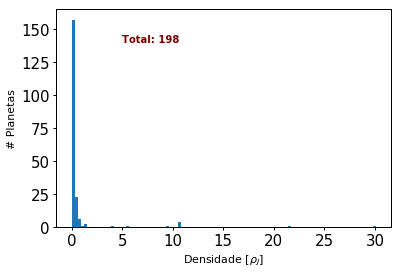

In [6]:
# Histograma
plt.hist(densidade,100)
plt.xlabel('Densidade [$\\rho_{J}$]',fontsize=11)
plt.ylabel('# Planetas',fontsize=11)
plt.text(5,140,'Total: 198',fontweight='bold',color='maroon')

amostra['density'] = densidade #adicionando a densidade à tabela de amostras filtradas
amostra['density_error'] = denserro

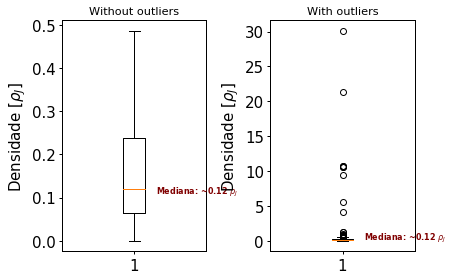

In [7]:
# Boxplot
plt.subplot(1,2,1)
# escondendo outliers
plt.title('Without outliers')
plt.boxplot(densidade, showfliers = False)
plt.ylabel('Densidade [$\\rho_{J}$]')
plt.text(1.15,0.11,'Mediana: ~0.12 $\\rho_{J}$',fontweight='bold',color='maroon',size = 8)

plt.subplot(1,2,2)
plt.title('With outliers')
plt.boxplot(densidade, showfliers = True)
plt.ylabel('Densidade [$\\rho_{J}$]')
plt.text(1.15,0.11,'Mediana: ~0.12 $\\rho_{J}$',fontweight='bold',color='maroon',size = 8)

plt.tight_layout()

## Obtendo Média e Desvio Padrão por Jackknife

In [8]:
dens = np.array(amostra['density'])

teste_estatistico = np.mean
media, bias, desvio_padrao, intervalo_conf = aps.jackknife_stats(dens, teste_estatistico,0.95)

print ('Média = ' + str(media))
print ('Desvio Padrão = ' +str(desvio_padrao))

Média = 0.7503881533552768
Desvio Padrão = 0.21835508113931343


## Salvando Tabelas das Classes dos Planetas

In [9]:
fluffy_filter = amostra['density'] < 1 - 2*desvio_padrao #filtro para identificar fluffies
bricky_filter = amostra['density'] > 1 + 2*desvio_padrao #filtro para identificar brickies

amostra_fluffy = amostra[fluffy_filter]
amostra_bricky = amostra[bricky_filter]
amostra_regular = amostra[np.logical_not(bricky_filter) &  np.logical_not(fluffy_filter)] #amostra de 'Jupiteres regulares'

amostra_fluffy.to_csv('fluffy_sample.csv',index = False)
amostra_bricky.to_csv('bricky_sample.csv', index = False)
amostra_regular.to_csv('regular_sample.csv', index = False)

In [10]:
amostra_fluffy

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names,errormass,errorradius,density,density_error
86,CVSO 30 b,Confirmed,6.200,1.7000,1.9000,5.500,1.400,1.4000,1.910,0.2100,...,3740.0,NaN,NaN,NaN,NaN,PTFO 8-8695,1.9000,0.2100,0.212424,0.409642
108,CoRoT-28 b,Confirmed,0.484,0.0870,0.0870,0.484,0.087,0.0870,0.955,0.0660,...,5150.0,100.0,100.0,NaN,NaN,NaN,0.0870,0.0660,0.132662,0.029828
109,CoRoT-29 b,Confirmed,0.850,0.2000,0.2000,0.850,0.200,0.2000,0.900,0.1600,...,5260.0,100.0,100.0,NaN,NaN,NaN,0.2000,0.1600,0.278357,0.158552
112,CoRoT-31 b,Confirmed,0.840,0.3400,0.3400,NaN,NaN,NaN,1.460,0.3000,...,5370.0,126.0,99.0,NaN,NaN,NaN,0.3400,0.3000,0.064437,0.045362
113,CoRoT-32 b,Confirmed,0.150,0.1000,0.1000,NaN,NaN,NaN,0.570,0.0600,...,5970.0,100.0,100.0,NaN,NaN,CoRoT-223977153,0.1000,0.0600,0.193365,0.064051
144,EPIC 211391664 b,Confirmed,0.101,0.0250,0.0250,NaN,NaN,NaN,0.380,0.0180,...,6120.0,80.0,80.0,NaN,NaN,"2MASS 08255719+1130402, K2-98",0.0250,0.0270,0.439422,0.094308
145,EPIC 211418729 b,Confirmed,1.850,0.2300,0.2200,NaN,NaN,NaN,0.942,0.0320,...,5027.0,62.0,57.0,NaN,NaN,NaN,0.2300,0.0320,0.528361,0.132918
146,EPIC 211442297 b,Confirmed,0.840,0.1800,0.2000,NaN,NaN,NaN,1.115,0.0570,...,5560.0,56.0,58.0,NaN,NaN,NaN,0.2000,0.0610,0.144666,0.037428
157,EPIC 216468514 b,Confirmed,0.840,0.0800,0.0800,NaN,NaN,NaN,1.440,0.1500,...,6030.0,120.0,120.0,NaN,NaN,"2MASS 18595649-221736, EPIC 216468514",0.0800,0.1500,0.067159,0.021664
162,EPIC 220501947 b,Confirmed,0.336,0.0120,0.0120,NaN,NaN,NaN,0.947,0.0050,...,4444.0,70.0,70.0,NaN,NaN,2MASS 01182635+0649004,0.0120,0.0120,0.094450,0.003765


In [11]:
amostra_bricky

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names,errormass,errorradius,density,density_error
93,CoRoT-15 b,Confirmed,63.40,4.10000,4.300,63.3,4.0,4.0,1.120,0.150,...,NaN,NaN,NaN,NaN,NaN,2MASS J06282781+0611105,4.30000,0.300,10.773246,47.126921
114,CoRoT-33 b,Confirmed,59.20,1.80000,1.800,59.0,1.8,1.8,1.100,0.530,...,5225.0,80.0,80.0,NaN,NaN,"2MASS 18383391 + 0537287, USNO-A2 0900-13338694",1.80000,0.530,10.618301,24.512732
133,EPIC 201637175 b,Confirmed,1.40,1.40000,0.000,1.4,1.4,0.0,0.250,0.250,...,3830.0,100.0,100.0,NaN,NaN,NaN,1.40000,0.250,21.390424,70.814905
158,EPIC 219388192 b,Confirmed,36.50,0.09000,0.090,NaN,NaN,NaN,0.937,0.042,...,5850.0,85.0,85.0,NaN,NaN,"CWW 89A, 2MASS J19173402-1652177",0.09000,0.042,10.592183,1.713927
347,HATS-12 b,Confirmed,2.38,0.08700,0.087,NaN,NaN,NaN,0.514,0.114,...,6408.0,75.0,75.0,NaN,NaN,NaN,0.08700,0.114,4.184070,2.807651
1057,K2-33 b,Confirmed,3.60,3.59999,0.000,NaN,NaN,NaN,0.451,0.033,...,3540.0,70.0,70.0,NaN,NaN,EPIC 205117205,3.59999,0.033,9.368806,33.790252
1121,KOI-415 b,Confirmed,62.14,2.69000,2.690,NaN,NaN,NaN,0.790,0.070,...,5810.0,80.0,80.0,NaN,NaN,NaN,2.69000,0.120,30.088557,82.091373
3481,NLTT 41135,Confirmed,33.70,2.80000,2.800,33.7,2.8,2.8,1.130,0.170,...,3230.0,130.0,130.0,NaN,NaN,NaN,2.80000,0.270,5.575784,16.115678
3648,WASP-128 b,Confirmed,37.19,0.85000,0.830,NaN,NaN,NaN,0.937,0.180,...,5950.0,50.0,50.0,NaN,NaN,2MASS J11312609-4141222,0.85000,0.220,10.792419,11.913995


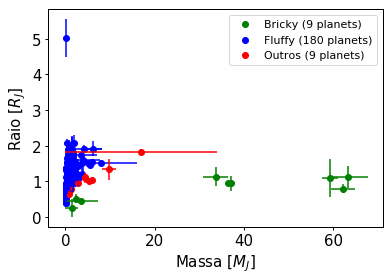

In [12]:
#Scatters
plt.scatter(amostra_bricky.mass,amostra_bricky.radius,label='Bricky (9 planets)',color='green')
plt.scatter(amostra_fluffy.mass,amostra_fluffy.radius,label='Fluffy (180 planets)',color='blue')
plt.scatter(amostra_regular.mass,amostra_regular.radius,label='Outros (9 planets)',color='red')

#Barras de erro

plt.errorbar(amostra_bricky.mass,amostra_bricky.radius, xerr=[amostra_bricky.errormass,amostra_bricky.errormass],yerr=[amostra_bricky.errorradius,amostra_bricky.errorradius],fmt='none',color='green',label='')
plt.errorbar(amostra_fluffy.mass,amostra_fluffy.radius, xerr=[amostra_fluffy.errormass,amostra_fluffy.errormass],yerr=[amostra_fluffy.errorradius,amostra_fluffy.errorradius],fmt='none',color='blue',label='')
plt.errorbar(amostra_regular.mass,amostra_regular.radius, xerr=[amostra_regular.errormass,amostra_regular.errormass],yerr=[amostra_regular.errorradius,amostra_regular.errorradius],fmt='none',color='red',label='')

plt.xlabel('Massa [$M_{J}$]')
plt.ylabel('Raio [$R_{J}$]')

plt.legend(loc='best', fontsize=11)

### Parágrafo

The observing process consists of collecting photons from the target source, which is subject to various sources of errors. This way, the erros on the data can be assumed gaussian, since  it is the combination of random errors from each collecting event.
Following this, the (log)likelihood function would follow a $\chi^{2}$ distribution and the maximum likelihood function matches the least $\chi^{2}$ value. Thus, we used the Least Square Method to fit the models' parameters.

#### Ajuste por ODR (Orthogonal Differences Regression)

##### Se não for útil nem considere

Não usa mínimos quadrados, usa Orthongoal Distance Regression, mas é única forma que achamos que considera ambos os erros.


parametros bricky (A, b): [0.42879512 0.20942682]
parametros fluffy (A, b): [1.21725451 0.17230458]
parametros regular (A, b): [0.67371966 0.27734701]


/home/math/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


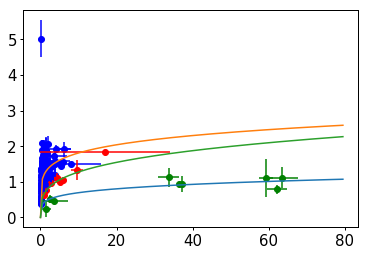

In [14]:
def power_law_function(p,x):
    A,b = p
    return A*x**b

import scipy.odr as odr

model = odr.Model(power_law_function)

bricky_data = odr.RealData(amostra_bricky.mass, amostra_bricky.radius, sx=amostra_bricky.errormass, sy=amostra_bricky.errorradius)
fluffy_data = odr.RealData(amostra_fluffy.mass, amostra_fluffy.radius, sx=amostra_fluffy.errormass, sy=amostra_fluffy.errorradius)
regular_data = odr.RealData(amostra_regular.mass, amostra_regular.radius, sx=amostra_regular.errormass, sy=amostra_regular.errorradius)

ODR_b = odr.ODR(bricky_data, model, beta0=[0., 1.])
ODR_f = odr.ODR(fluffy_data, model, beta0=[0., 1.])
ODR_r = odr.ODR(regular_data, model, beta0=[0., 1.])

out_b = ODR_b.run()
out_f = ODR_f.run()
out_r = ODR_r.run()

x = np.arange(0,80,0.5)

#Scatters
plt.scatter(amostra_bricky.mass,amostra_bricky.radius,label='Bricky (9 planets)',color='green')
plt.scatter(amostra_fluffy.mass,amostra_fluffy.radius,label='Fluffy (180 planets)',color='blue')
plt.scatter(amostra_regular.mass,amostra_regular.radius,label='Outros (9 planets)',color='red')

plt.errorbar(amostra_bricky.mass,amostra_bricky.radius, xerr=[amostra_bricky.errormass,amostra_bricky.errormass],yerr=[amostra_bricky.errorradius,amostra_bricky.errorradius],fmt='none',color='green',label='')
plt.errorbar(amostra_fluffy.mass,amostra_fluffy.radius, xerr=[amostra_fluffy.errormass,amostra_fluffy.errormass],yerr=[amostra_fluffy.errorradius,amostra_fluffy.errorradius],fmt='none',color='blue',label='')
plt.errorbar(amostra_regular.mass,amostra_regular.radius, xerr=[amostra_regular.errormass,amostra_regular.errormass],yerr=[amostra_regular.errorradius,amostra_regular.errorradius],fmt='none',color='red',label='')


plt.plot(x,power_law_function(out_b.beta,x))
plt.plot(x,power_law_function(out_f.beta,x))
plt.plot(x,power_law_function(out_r.beta,x))

print("parametros bricky (A, b): "+str(out_b.beta))
print("parametros fluffy (A, b): "+str(out_f.beta))
print("parametros regular (A, b): "+str(out_r.beta))


#### Ajuste por mínimos quadrados
##### Rotina do scipy.optimize

Essa usa mínimos quadrados, mas não considera os erros. Não conseguimos implementar a técnica usada em Tratamentos


parametros bricky (A, b): [0.34737205 0.27145555]
parametros fluffy (A, b): [1.29959004 0.10026899]
parametros regular (A, b): [0.63523967 0.34927034]


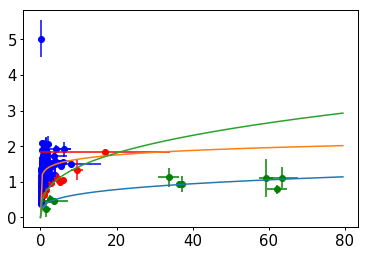

In [16]:
def power_law_function2(x,A,b):
    return A*x**b

import scipy.optimize as optimization

bricky_least_square_fit = optimization.curve_fit(power_law_function2, amostra_bricky.mass, amostra_bricky.radius)[0]
fluffy_least_square_fit = optimization.curve_fit(power_law_function2, amostra_fluffy.mass, amostra_fluffy.radius)[0]
regular_least_square_fit = optimization.curve_fit(power_law_function2, amostra_regular.mass, amostra_regular.radius)[0]

x = np.arange(0,80,0.5)

#Scatters
plt.scatter(amostra_bricky.mass,amostra_bricky.radius,label='Bricky (9 planets)',color='green')
plt.scatter(amostra_fluffy.mass,amostra_fluffy.radius,label='Fluffy (180 planets)',color='blue')
plt.scatter(amostra_regular.mass,amostra_regular.radius,label='Outros (9 planets)',color='red')

plt.errorbar(amostra_bricky.mass,amostra_bricky.radius, xerr=[amostra_bricky.errormass,amostra_bricky.errormass],yerr=[amostra_bricky.errorradius,amostra_bricky.errorradius],fmt='none',color='green',label='')
plt.errorbar(amostra_fluffy.mass,amostra_fluffy.radius, xerr=[amostra_fluffy.errormass,amostra_fluffy.errormass],yerr=[amostra_fluffy.errorradius,amostra_fluffy.errorradius],fmt='none',color='blue',label='')
plt.errorbar(amostra_regular.mass,amostra_regular.radius, xerr=[amostra_regular.errormass,amostra_regular.errormass],yerr=[amostra_regular.errorradius,amostra_regular.errorradius],fmt='none',color='red',label='')


# plt.plot(x,power_law_function(out_b.beta,x))
# plt.plot(x,power_law_function(out_f.beta,x))
# plt.plot(x,power_law_function(out_r.beta,x))

plt.plot(x,power_law_function2(x,*bricky_least_square_fit))
plt.plot(x,power_law_function2(x,*fluffy_least_square_fit))
plt.plot(x,power_law_function2(x,*regular_least_square_fit))

print("parametros bricky (A, b): "+str(bricky_least_square_fit))
print("parametros fluffy (A, b): "+str(fluffy_least_square_fit))
print("parametros regular (A, b): "+str(regular_least_square_fit))
